In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [329]:
books=pd.read_csv('C:\\Users\\lordn\\Downloads\\Major-Pro\\BX-Books.csv',sep=";",error_bad_lines=False,encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\lordn\anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [330]:
books["Book-Title"]=books["Book-Title"].str.lower()
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,classical mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,clara callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,decision in normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,flu: the story of the great influenza pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,the mummies of urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [331]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [332]:
books=books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [333]:
books.head(4)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,classical mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,clara callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,decision in normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,flu: the story of the great influenza pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux


In [334]:
books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year'},inplace=True)

In [335]:
books.head(2)

,ISBN,title,author,year,Publisher
0,0195153448,classical mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,clara callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [336]:
users=pd.read_csv('C:\\Users\\lordn\\Downloads\\Major-Pro\\BX-Users.csv',sep=";",error_bad_lines=False,encoding='latin-1')

In [337]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [338]:
ratings=pd.read_csv('C:\\Users\\lordn\\Downloads\\Major-Pro\\BX-Book-Ratings.csv',sep=";",error_bad_lines=False,encoding='latin-1')

In [339]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [340]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 5)
(278858, 3)
(1149780, 3)


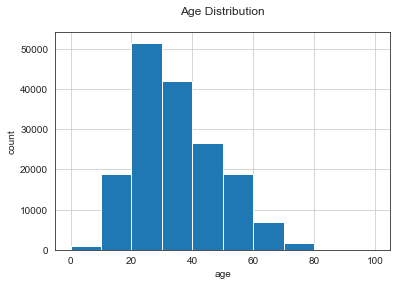

In [341]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution\n')
plt.xlabel('age')
plt.ylabel('count')
plt.savefig('age_dist.png', bbox_inches='tight')
plt.show()

In [342]:
book_data=books
book_data.year = pd.to_numeric(book_data.year, errors='coerce')
book_data.year.replace(0, np.nan, inplace=True) 

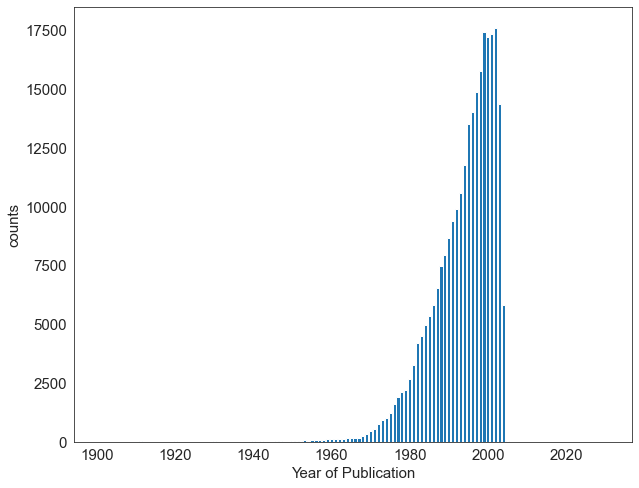

In [343]:
year = book_data.year.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

In [344]:
x=ratings['User-ID'].value_counts()>200 

In [345]:
y=x[x].index

In [346]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183, 155916,  44296,  73681,  59727,  28634, 188951,   9856,
            268622, 274808],
           dtype='int64', length=899)

In [347]:
ratings=ratings[ratings['User-ID'].isin(y)]

In [348]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8


In [349]:
ratings.shape

(526356, 3)

In [350]:
ratings_books=ratings.merge(books,on='ISBN')

In [351]:
ratings_books.head()

,User-ID,ISBN,Book-Rating,title,author,year,Publisher
0,277427,002542730X,10,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
1,3363,002542730X,0,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
2,11676,002542730X,6,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
3,12538,002542730X,10,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
4,13552,002542730X,0,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc


In [352]:
ratings_books.shape

(487671, 7)

In [353]:
grp_rating=ratings_books.groupby('title')['Book-Rating'].count().reset_index()

In [354]:
grp_rating.rename(columns={'Book-Rating':'no-of-rating'},inplace=True)

In [355]:
final_ratings=ratings_books.merge(grp_rating,on='title')

In [356]:
final_ratings.rename(columns={'Book-Rating':'BookRating','no-of-rating':'noofrating'},inplace=True)
final_ratings.head()

,User-ID,ISBN,BookRating,title,author,year,Publisher,noofrating
0,277427,002542730X,10,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82


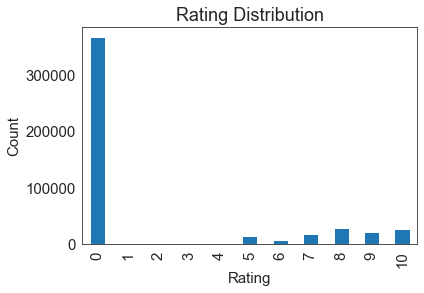

In [357]:
plt.rc("font", size = 15)
final_ratings.BookRating.value_counts(sort = False).plot(kind = 'bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.plot()
plt.savefig("Ratings Distribution.jpg", bbox_inches = "tight", dpi = 100)

In [358]:
grp_rating.columns

Index(['title', 'no-of-rating'], dtype='object')

In [359]:
final_ratings.shape

(487671, 8)

In [360]:
final_ratings=final_ratings[final_ratings['noofrating']>=50]

In [361]:
final_ratings

,User-ID,ISBN,BookRating,title,author,year,Publisher,noofrating
0,277427,002542730X,10,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,politically correct bedtime stories: modern ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
238675,255489,0553579983,7,and then you die,Iris Johansen,1998.0,Bantam,50
238676,256407,0553579983,0,and then you die,Iris Johansen,1998.0,Bantam,50
238677,257204,0553579983,0,and then you die,Iris Johansen,1998.0,Bantam,50
238678,261829,0553579983,0,and then you die,Iris Johansen,1998.0,Bantam,50


In [362]:
final_ratings.drop_duplicates(['User-ID','title'],inplace=True)

In [363]:
final_ratings.shape

(61137, 8)

In [364]:
book_pivot=final_ratings.pivot_table(columns='User-ID',index='title',values='BookRating')

In [365]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to die: a novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 charing cross road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wuthering heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
year of wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
you belong to me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
book_pivot.fillna(0,inplace=True)

In [367]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to die: a novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 charing cross road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wuthering heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
year of wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
you belong to me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [368]:
import scipy

In [369]:
from scipy.spatial.distance import correlation
from scipy.sparse import csr_matrix

In [370]:
book_sparse=csr_matrix(book_pivot)

In [371]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [372]:
from sklearn.neighbors import NearestNeighbors

In [373]:
model=NearestNeighbors(algorithm='brute')

In [374]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [375]:
np.where(book_pivot.index==147)

(array([], dtype=int64),)

In [376]:
distances, suggestions= model.kneighbors(book_pivot.iloc[147,:].values.reshape(1,-1),n_neighbors=6)

In [377]:
distances 

array([[ 0.        , 28.70540019, 28.94822965, 29.27456234, 29.63106478,
        29.83286778]])

In [378]:
suggestions

array([[147, 383, 689, 315, 328, 184]], dtype=int64)

In [379]:
book_pivot.index[147]

'dead run'

In [380]:
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['dead run', 'no safe place', 'the woman next door', 'last man standing',
       'long after midnight', 'exclusive'],
      dtype='object', name='title')


In [381]:
np.where(book_pivot.index=='dead run')[0][0]

147

In [382]:
no_before_book=[]
a=final_ratings.values.tolist()
a.sort(key=lambda x:x[2])

In [383]:
ct=0
for i in range(len(a)):
    vl=a[i][3]
    if vl not in no_before_book:
        no_before_book.append(vl)
        ct+=1
    if ct==5:
        break

In [384]:
no_before_book

['politically correct bedtime stories: modern tales for our life and times',
 'the poisonwood bible: a novel',
 'bel canto: a novel',
 'one for the money (stephanie plum novels (paperback))',
 'the secret garden']

In [385]:
def Recommend_Book(Name_of_Book):
    book_id=np.where(book_pivot.index==Name_of_Book)[0][0]
   # print(book_id)
    distances, suggestions= model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)
    a=[]
    for i in range(1,len(suggestions[0])):
        a.append(book_pivot.index[suggestions[0][i]])
    return a

def Recommend_BookT():
    return no_before_book

In [386]:
g=Recommend_Book('dead run')
print(g)

['no safe place', 'the woman next door', 'last man standing', 'long after midnight', 'exclusive']


In [387]:
#-------------------------------------- MOVIE RECOMMENDER --------------------------------------------------------------------

In [388]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

In [389]:
movies=pd.read_csv(r'C:\Users\lordn\Downloads\movies.csv')

In [390]:
ratings=pd.read_csv(r'C:\Users\lordn\Downloads\ratings.csv')

In [393]:
movies["title"]=movies["title"].str.replace("[)(,.:;!%$@^&*?<>{}\|/~`]","")
movies["title"]=movies["title"].str.lower()
movies

,movieId,title,genres
0,1,toy story 1995,Adventure|Animation|Children|Comedy|Fantasy
1,2,jumanji 1995,Adventure|Children|Fantasy
2,3,grumpier old men 1995,Comedy|Romance
3,4,waiting to exhale 1995,Comedy|Drama|Romance
4,5,father of the bride part ii 1995,Comedy
...,...,...,...
9737,193581,black butler book of the atlantic 2017,Action|Animation|Comedy|Fantasy
9738,193583,no game no life zero 2017,Animation|Comedy|Fantasy
9739,193585,flint 2017,Drama
9740,193587,bungo stray dogs dead apple 2018,Action|Animation


In [394]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [395]:
dataset=pd.merge(ratings,movies,on='movieId')
dataset.tail()

,userId,movieId,rating,timestamp,title,genres
100831,610,160341,2.5,1479545749,bloodmoon 1997,Action|Thriller
100832,610,160527,4.5,1479544998,sympathy for the underdog 1971,Action|Crime|Drama
100833,610,160836,3.0,1493844794,hazard 2005,Action|Drama|Thriller
100834,610,163937,3.5,1493848789,blair witch 2016,Horror|Thriller
100835,610,163981,3.5,1493850155,31 2016,Horror


In [396]:
import datetime

In [397]:
from datetime import datetime,date
dataset['datetime']=pd.to_datetime(dataset['timestamp'])

In [398]:
dataset.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
title         9719
genres         951
datetime     85043
dtype: int64

In [399]:
a=dataset
a=a.groupby('title')['rating'].mean()
a

title
'71 2014                                 4.000000
'burbs the 1989                          3.176471
'hellboy' the seeds of creation 2004     4.000000
'night mother 1986                       3.000000
'round midnight 1986                     3.500000
                                           ...   
zootopia 2016                            3.890625
zulu 1964                                4.000000
zulu 2013                                1.500000
¡three amigos 1986                       3.134615
à nous la liberté freedom for us 1931    1.000000
Name: rating, Length: 9719, dtype: float64

In [400]:
sorted_ratings_mov=a.sort_values(ascending=False)

In [401]:
sorted_ratings_mov

title
deathgasm 2015                                 5.0
tales of manhattan 1942                        5.0
vovka in the kingdom of far far away 1965      5.0
galaxy of terror quest 1981                    5.0
little dieter needs to fly 1997                5.0
                                              ... 
bad santa 2 2016                               0.5
don't look now 1973                            0.5
lionheart 1990                                 0.5
pokemon 4 ever aka pokémon 4 the movie 2002    0.5
son of god 2014                                0.5
Name: rating, Length: 9719, dtype: float64

In [402]:
b=dataset.groupby('title')['rating'].count()
b.tail()

title
zootopia 2016                            32
zulu 1964                                 4
zulu 2013                                 1
¡three amigos 1986                       26
à nous la liberté freedom for us 1931     1
Name: rating, dtype: int64

In [403]:
new_record=pd.DataFrame()
new_record['Average_ratings']=a

In [404]:
new_record['count of total ratings']=b

In [405]:
new_record.head()

,Average_ratings,count of total ratings
title,,
'71 2014,4.000000,1
'burbs the 1989,3.176471,17
'hellboy' the seeds of creation 2004,4.000000,1
'night mother 1986,3.000000,1
'round midnight 1986,3.500000,2


In [406]:
import seaborn as sns

In [407]:
sns.set_style('white')
%matplotlib inline

In [408]:
import pandas.util.testing as tm

<AxesSubplot:>

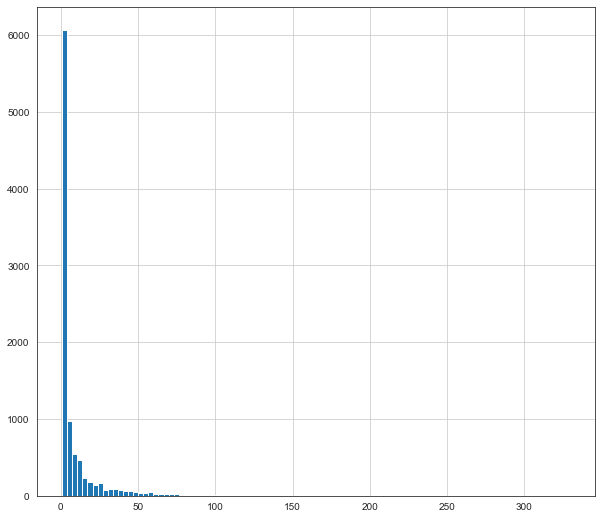

In [409]:
plt.figure(figsize=(10,9))
new_record['count of total ratings'].hist(bins=100)

<AxesSubplot:>

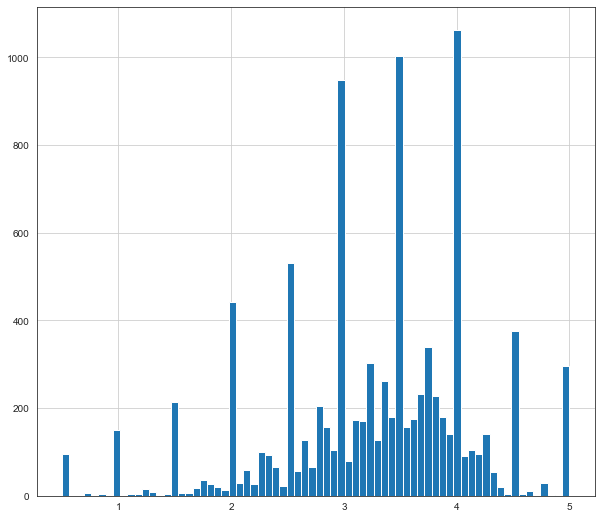

In [410]:
plt.figure(figsize=(10,9))
new_record['Average_ratings'].hist(bins=70)

<Figure size 0x432 with 0 Axes>

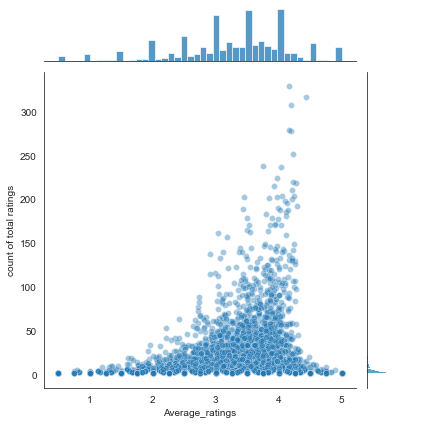

In [411]:
plt.figure(figsize=(0,6))
sns.jointplot(x='Average_ratings',y='count of total ratings',data=new_record,alpha=0.4)

In [412]:
movie_matrix=dataset.pivot_table(index='userId',columns='title',values='rating')

In [413]:
movie_matrix.head()

title,'71 2014,'burbs the 1989,'hellboy' the seeds of creation 2004,'night mother 1986,'round midnight 1986,'salem's lot 2004,'til there was you 1997,'tis the season for love 2015,00 schneider - jagd auf nihil baxter 1994,1-900 06 1994,...,zookeeper 2011,zoolander 2 2016,zoolander 2001,zoom 2006,zoom 2015,zootopia 2016,zulu 1964,zulu 2013,¡three amigos 1986,à nous la liberté freedom for us 1931
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [415]:
rt=movie_matrix['xxx 2002']

In [416]:
mv=movie_matrix.corrwith(rt)
mv

C:\Users\lordn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\lordn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 2014                                      NaN
'burbs the 1989                               NaN
'hellboy' the seeds of creation 2004          NaN
'night mother 1986                            NaN
'round midnight 1986                          NaN
                                           ...   
zootopia 2016                            0.267261
zulu 1964                                     NaN
zulu 2013                                     NaN
¡three amigos 1986                       0.500000
à nous la liberté freedom for us 1931         NaN
Length: 9719, dtype: float64

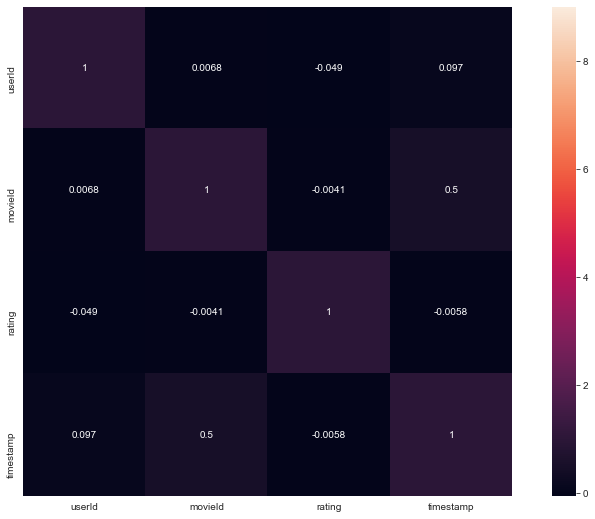

In [417]:
correlation_metric=dataset.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(correlation_metric,annot=True,vmax=9,square=True)
plt.show()

In [418]:
movie_smlr_mv=pd.DataFrame(mv,columns=['Correlation'])
movie_smlr_mv.dropna(inplace=True)
#print(movie_smlr_mv.shape)
#ok=pd.DataFrame([movie_smlr_mv.rename(None)])

In [434]:
#b=sorted_ratings_mov.head(5)
def Recommend_MOVIE(mv_n):
    rtg=movie_matrix[mv_n]
    mve=movie_matrix.corrwith(rtg)
    #movie_smlr_mv=pd.DataFrame(mve,columns=['Correlation'])
    #movie_smlr_mv.dropna(inplace=True)
    #a.sort_values(by=['Correlation'])
    mve.dropna(inplace=True)
    mve=mve.sort_values(ascending=False)
    mve=mve.head(5)
    return mve

def Recommend_MOVIET():
    return sorted_ratings_mov.head(5)

#a=Recommend_MOVIE('toy story 1995')

In [420]:
pip install pyttsx3

In [421]:
pip install SpeechRecognition

Note: you may need to restart the kernel to use updated packages.


In [422]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [423]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [424]:
import webbrowser

In [425]:
import os
import smtplib

In [435]:
import pyttsx3 
import speech_recognition as sr 
import datetime
import wikipedia
import webbrowser
import os
import smtplib

engine = pyttsx3.init('sapi5')
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[0].id)

def speak(audio):
    engine.say(audio)
    engine.runAndWait()

def wishMe():
    hour = int(datetime.datetime.now().hour)
    if hour>=0 and hour<12:
        speak("Good Morning Sir!")
    elif hour>=12 and hour<18:
        speak("Good Afternoon Sir!")  
    else:
        speak("Good Evening Sir!")  
    speak("I am Anand. Please tell me how may I help you")      

ok=0  
def takeCommand():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print("Listening...")
        audio = r.record(source,duration=5)
    try:
        print("Recognizing...")    
        query = r.recognize_google(audio,language='en-in')
        print(f"User said: {query}\n")
        #ok=1
    except Exception as e:
        speak("Say that again please...")  
        return "None"
    return query

def Movie_Recommenders(id):
    if id==0:
        speak('Search for any similar Movie?')
        print('Search for any similar Movie?')
    elif id==1:
        speak('Tell that again')
        print('Tell that again')
    q=takeCommand().lower()
    ok=0
    if 'go back' in q:
        return
    if 'yes' in q:
        speak('Tell Movie Name')
        print('Tell Movie Name')
        mov_name=takeCommand().lower()
        ok=1
        a=Recommend_MOVIE(mov_name)
        print('Recommended Movies for:'+str(mov_name))
        speak('Recommended Movies for'+str(mov_name))
        print(a)
    elif 'no' in q:
        a=Recommend_MOVIET()
        print('Recommended movies are:')
        speak('Recommended movies are')
        ok=1
        print(a)
    if ok==0:
        Movie_Recommenders(1)
    return

def Book_Recommenders(id):
    if id==0:
        speak('Search for any similar Book?')
        print('Search for any similar Book?')
    elif id==1:
        speak('Tell that again')
        print('Tell that again')
    q=takeCommand().lower()
    ok=0
    if 'go back' in q:
        return
    if 'yes' in q:
        speak('Tell Book Name')
        print('Tell Book Name')
        bk_name=takeCommand().lower()
        ok=1
        a=Recommend_Book(bk_name)
        print('Recommended Books for:'+str(bk_name))
        speak('Recommended Books for'+str(bk_name))
        for x in a:
            print(x)
    elif 'no' in q:
        a=Recommend_BookT()
        print('Recommended Books are:')
        speak('Recommended books are')
        ok=1
        for x in a:
            print(x)
    if ok==0:
        Book_Recommenders(1)
    return

def sendEmail(to, content):
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.ehlo()
    server.starttls()
    server.login('17211A05M6@bvrit.ac.in', 'sridhar73')
    server.sendmail('17211A05M6@bvrit.ac.in', to, content)
    server.close()

#__name__="main"
if __name__ == "__main__":
    wishMe()
    
    while True:
        query = takeCommand().lower()
        #query = "open google"
       # query="open google"
        if'wikipedia' in query:
            speak('Searching Wikipedia...')
            #query = query.replace("wikipedia", "")
            results = wikipedia.summary(query, sentences=2)
            speak("According to Wikipedia")
            print(results)
            speak(results)
        elif 'open youtube' in query:
            speak('Searching youtube ...')
            webbrowser.open("youtube.com")
        elif 'open google' in query:
            speak('Searching google ...')
            webbrowser.open("google.com")
        elif 'open firefox' in query:
            speak('Searching firefox ...')
            webbrowser.open("firefox.com")
        elif 'hi' in query:
            speak('Hi Sir , tell me , how can i help you')
        elif 'open stackoverflow' in query:
            speak('Searching stackoverflow ...')
            webbrowser.open("stackoverflow.com")
        elif ('play music' in query) or ('play songs' in query) or ('play song' in query):
            music_dir= r'C:\Users\lordn\Downloads\Songs'
            songs=os.listdir(music_dir)
            print(songs)
            os.startfile(os.path.join(music_dir,songs[0]))
        elif 'exit' in query:
            print('Thank you Sir, see you again, have a good day')
            speak('Thank you Sir, see you again, have a good day')
            break
        elif 'who are you' in query:
            speak('Im anand Sir, the Voice assistant, created by Team A')
        elif 'time' in query:
            strTime=datetime.datetime.now().strftime("%H:%M:%S")
            speak(f"the time is {strTime} Sir")
        elif 'date' in query:
            strDate=datetime.date.today()
            speak(f"Todays date is {strDate} Sir")
        elif 'open powerpoint' in query:
            codePath=r"C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Microsoft Office\Microsoft PowerPoint 2010"
            os.startfile(codePath)
        elif 'open notepad' in query:
            codePath=r"C:\Users\lordn\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Accessories\Notepad"
            os.startfile(codePath)
        elif 'open zoom' in query:
            speak('opening zoom')
            webbrowser.open("zoom.com")
        elif 'open facebook' in query:
            speak('opening facebook')
            webbrowser.open("facebook.com")
        elif ('open instagram' in query) or ('open insta' in query):
            speak('opening Instagram')
            webbrowser.open("instagram.com")
        elif 'recommend book' in query:
            Book_Recommenders(0)
        elif 'recommend movie' in query:
            Movie_Recommenders(0)
        elif 'email to aravind' in query:
            try:
                speak("what should i say")
                content=takeCommand()
                to="17211A05L2@bvrit.ac.in"
                
                sendEmail(to,content)
                speak("Email has been sent")
            except Exception as e:
                print(e)
                speak("Sorry sir, Im not able to send this mail.")

Listening...
Recognizing...
User said: recommend movie

Search for any similar Movie?
Listening...
Recognizing...
Recommended movies are:
title
deathgasm 2015                               5.0
tales of manhattan 1942                      5.0
vovka in the kingdom of far far away 1965    5.0
galaxy of terror quest 1981                  5.0
little dieter needs to fly 1997              5.0
Name: rating, dtype: float64
Listening...
Recognizing...
Listening...
Recognizing...
User said: recommend movie

Search for any similar Movie?
Listening...
Recognizing...
User said: yes

Tell Movie Name
Listening...
Recognizing...
User said: Toy Story 1995

Recommended Movies for:toy story 1995:
title
suburban commando 1991                                              1.0
passenger 57 1992                                                   1.0
ewok adventure the aka caravan of courage an ewok adventure 1984    1.0
after earth 2013                                                    1.0
comebacks the 2007  